In [2]:
# !pip install pydeseq2

In [3]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

# Data Science Tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# DGE via PyDeSeq2

In [ ]:
df = pd.read_csv('counts.csv')
df = df.rename(columns={'Unnamed: 0': 'Gene'})
df = df.set_index('Gene')
# df = df.T
counts = df
counts

In [ ]:
Non_TD = counts.iloc[0:9]
Non_TD_T   = counts.iloc[9:18]
Her2_1   = counts.iloc[18:27]
Her2_1_T     = counts.iloc[27:36]
Her2_2   = counts.iloc[36:45]
Her2_2_T     = counts.iloc[45:54]
Her2_3   = counts.iloc[54:63]
Her2_3_T     = counts.iloc[63:72]

In [ ]:
counts_Ex_C = pd.concat([Her2_1_T,Her2_1])
# counts_Ex_C = pd.concat([Non_TD_T,Non_TD])
counts_Ex_C.shape

In [ ]:
metadata = pd.DataFrame(zip(counts_Ex_C.index, ['E','E','E','E','E','E','E','E','E',
                                                     'C','C','C',
                                                     'C','C','C',
                                                     'C','C','C'
                                                      ]),
                        columns = ['Sample', 'Condition'])
metadata_Ex_C = metadata.set_index('Sample')

metadata_Ex_C

dds = DeseqDataSet(counts=counts_Ex_C,
              metadata=metadata_Ex_C,
            design_factors="Condition")


#design_factors=["batch", "condition"] = ~ batch + condtion

dds.deseq2()

stat_res = DeseqStats(dds, contrast = ('Condition','E','C'))
stat_res.summary()

In [ ]:
res = stat_res.results_df
res['log2FoldChange'] = res['log2FoldChange'].astype('float')
res['padj'] = res['padj'].astype('float')
res.to_csv('DeSeq2_anti-HER2 #3.csv')
res

In [5]:
df = pd.read_csv('counts.csv')
df = df.rename(columns={'Unnamed: 0': 'Gene'})
df = df.set_index('Gene')
# df = df.T
counts = df

metadata = pd.DataFrame(zip(counts.index, ['G1','G1','G1',
                                           'G1','G1','G1',
                                           'G1','G1','G1',
                                           'G1','G1','G1',
                                           'G1','G1','G1',
                                           'G1','G1','G1',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2',
                                           'G2','G2','G2'
                                          ]),
                        columns = ['Sample', 'Condition'])
metadata = metadata.set_index('Sample')

dds = DeseqDataSet(counts=counts,
              metadata=metadata,
            design_factors="Condition")

dds.deseq2()

stat_res = DeseqStats(dds, contrast = ('Condition','G1','G2'))

df = pd.DataFrame(dds.layers["normed_counts"], columns=counts.columns, index=counts.index)
# df = df.T
df.to_csv('DeSeq2_normed_counts.csv')
df

Using None as control genes, passed at DeseqDataSet initialization


/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_90324/3122295271.py:35: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts,
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting LFCs...
... done in 0.04 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



,ADORA2A,ADORA2B,CD4,CD8A,CD27,CD28,CD40,CD45R0,CD45RA,CD272,...,PRF1,SELL,SIGLEC7,TNF,TNFRSF4,TNFRSF9,TNFRSF18,TNFSF18,VISTA,VTCN1
Gene,,,,,,,,,,,,,,,,,,,,,
Non-TD 1,7.444973,25.312908,58.815287,38.713860,76.683222,46.903330,28.290898,61.048779,43.925341,10.422962,...,41.691849,27.546400,3.722487,32.757881,8.933968,33.502379,14.889946,2.233492,13.400951,4.466984
Non-TD 2,17.534562,43.836405,21.918203,43.836405,78.905530,43.836405,17.534562,26.301843,39.452765,17.534562,...,56.987327,8.767281,4.383641,39.452765,21.918203,56.987327,13.150922,17.534562,48.220046,4.383641
Non-TD 3,17.435548,45.332425,45.332425,34.871096,118.561726,87.177740,24.409767,73.229301,24.409767,13.948438,...,66.255082,27.896877,6.974219,69.742192,20.922657,59.280863,20.922657,24.409767,20.922657,3.487110
Non-TD 4,48.319918,201.332990,153.013073,96.639835,144.959753,24.159959,40.266598,330.186104,72.479877,8.053320,...,8.053320,8.053320,8.053320,56.373237,48.319918,193.279671,32.213278,64.426557,16.106639,0.000000
Non-TD 5,3.847738,36.553513,50.020597,21.162560,161.605007,79.840569,0.000000,75.030896,110.622475,0.961935,...,90.421849,38.477383,6.733542,44.248990,14.429018,36.553513,24.048364,9.619346,19.238691,6.733542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
anti-HER2 #3 + Tumor 5,10.351218,2.587804,61.589746,5.693170,11.903900,11.903900,39.334627,37.781945,4.658048,35.711701,...,59.519502,27.430727,5.693170,57.449259,11.903900,22.255118,5.693170,3.622926,16.044388,3.622926
anti-HER2 #3 + Tumor 6,16.542973,1.879883,65.419937,10.527346,9.023440,12.031253,41.733408,113.544949,6.391603,49.628918,...,41.733408,34.589852,6.767580,81.962910,22.558599,13.535159,2.255860,12.407230,9.399416,4.511720
anti-HER2 #3 + Tumor 7,3.986857,0.996714,61.297926,9.967142,10.963857,10.963857,26.412928,28.904713,4.485214,66.281498,...,30.898142,35.881713,2.491786,67.776569,21.429356,0.498357,5.481928,4.485214,1.993428,2.990143


Exception ignored in: <function ResourceTracker.__del__ at 0x1052d9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1069a1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1052c1bc0>
Traceback (most recent call last

# Plots

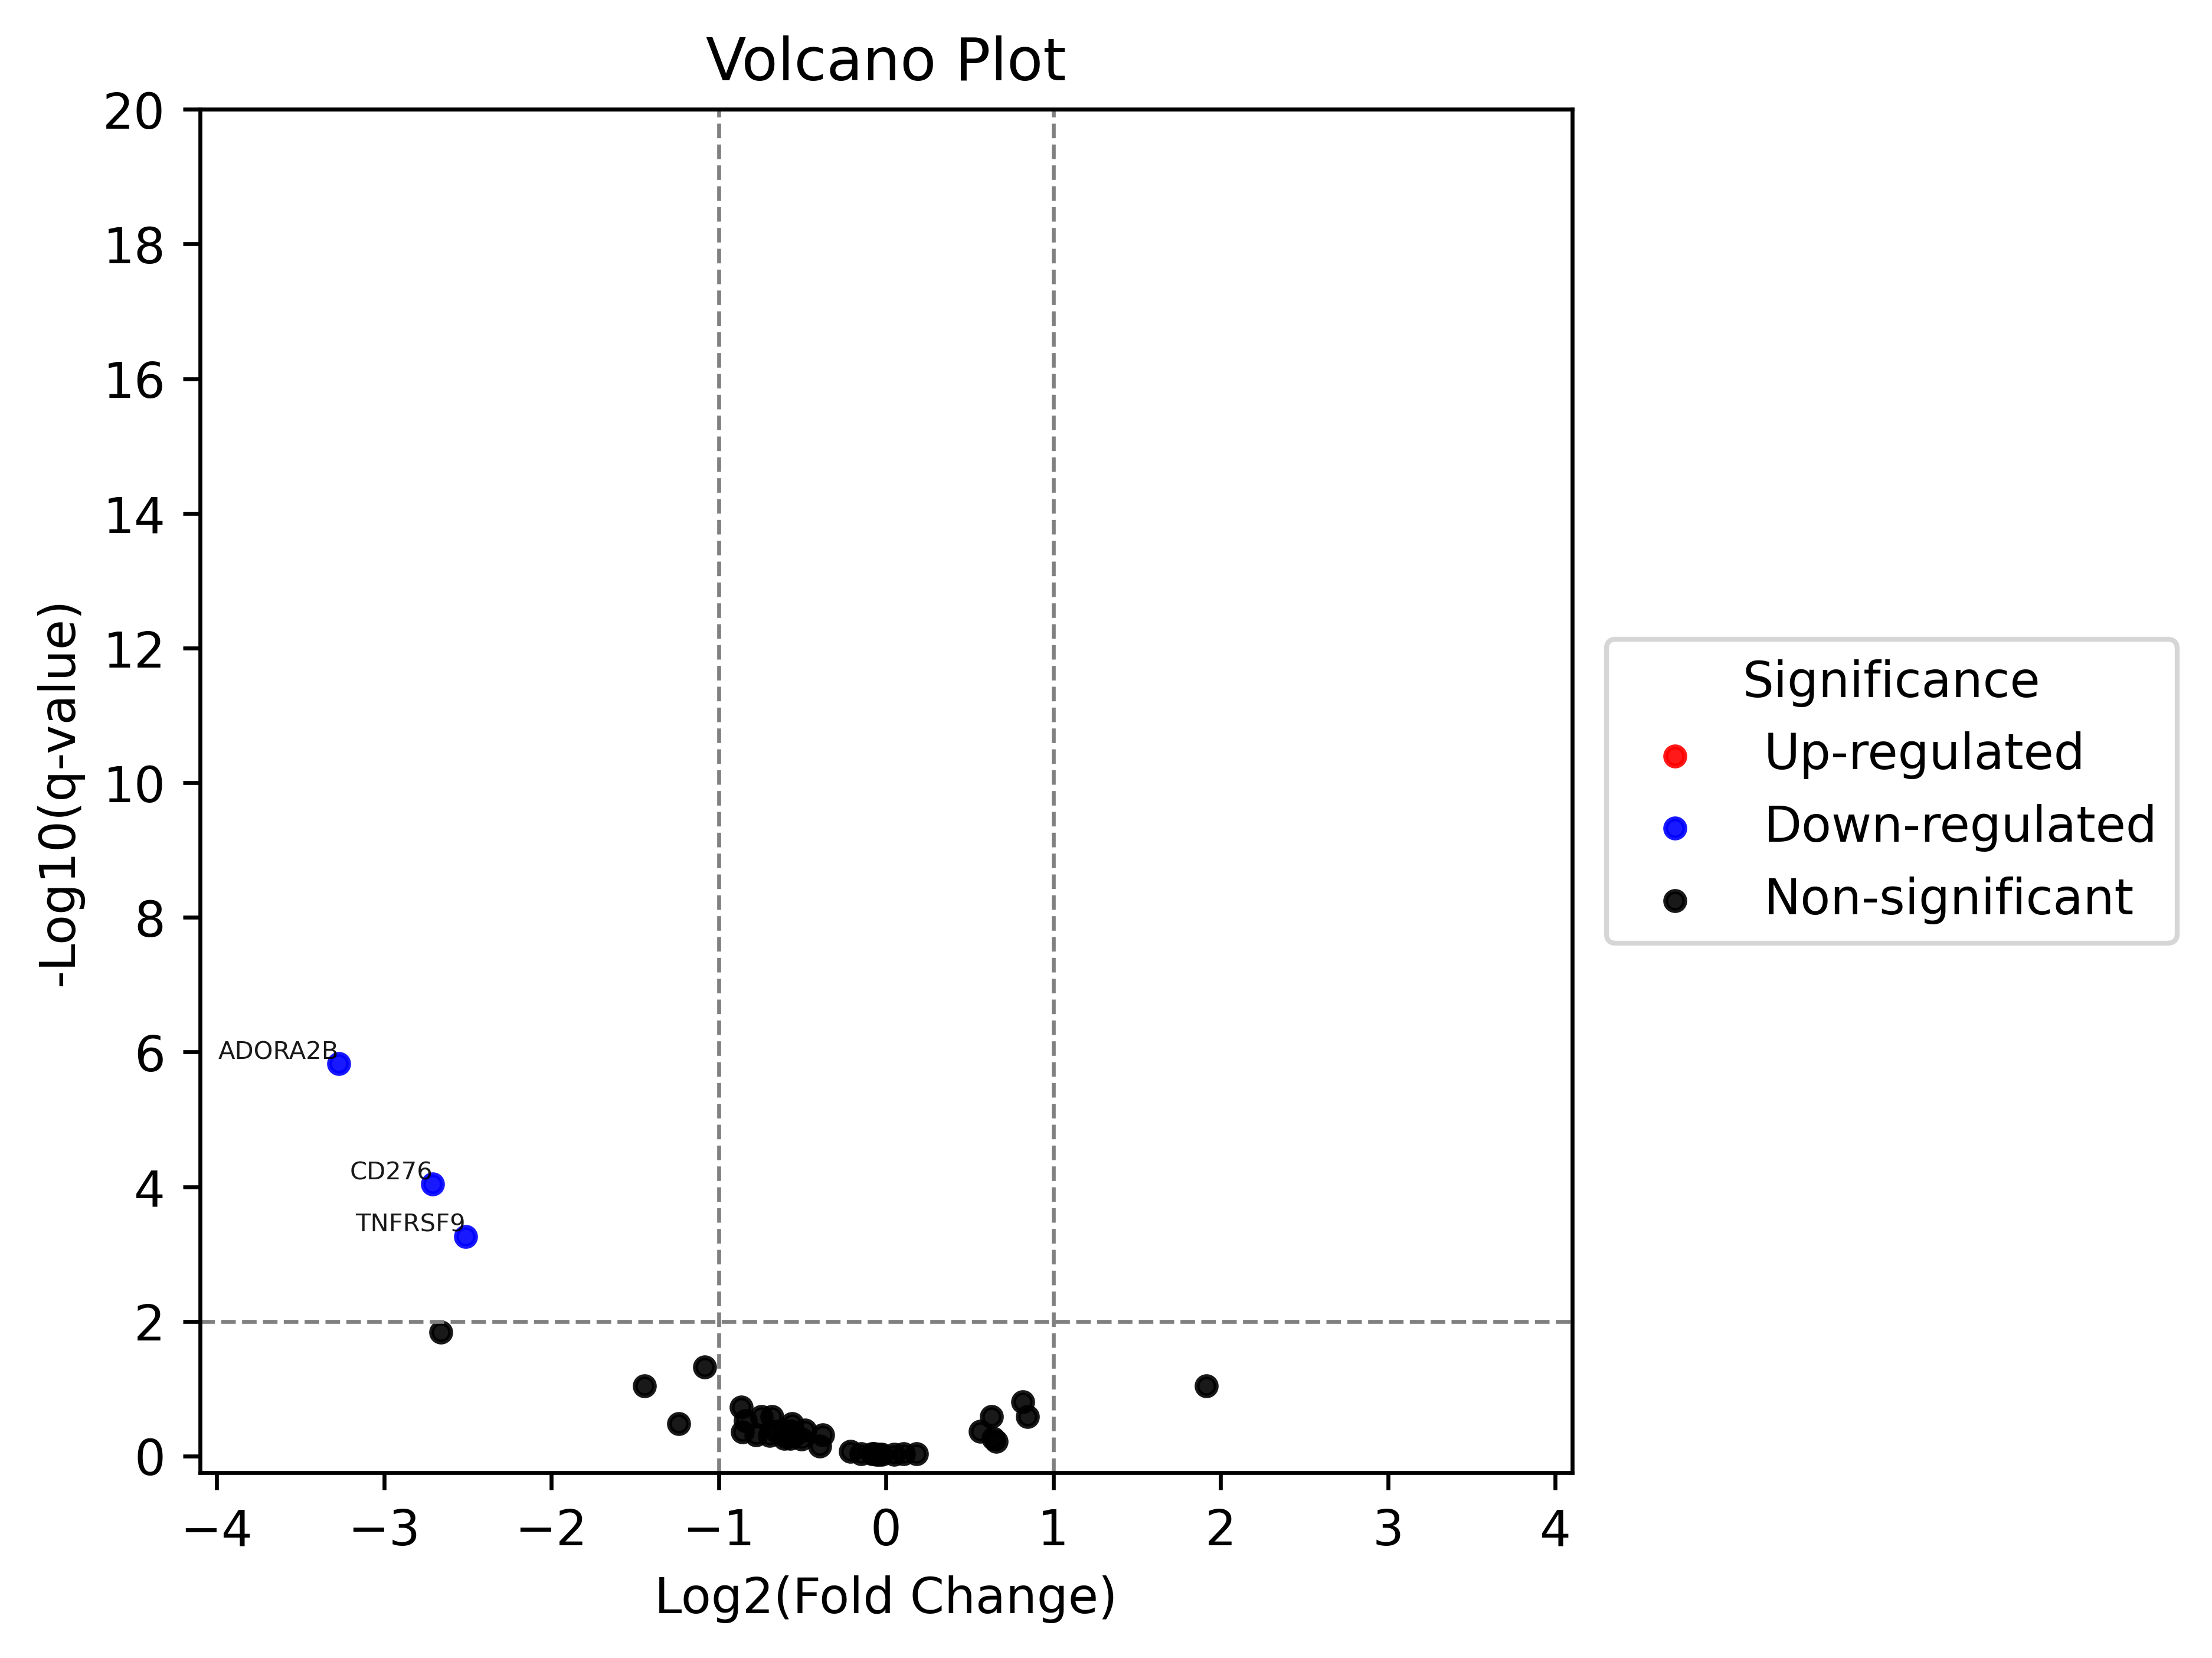

In [15]:
# read pydeseq2 outputs

# comp = 'anti-HER2 #3'
comp = 'Non-TD'

df = pd.read_csv(f'DeSeq2_{comp}.csv')
df = df.rename(columns={'Unnamed: 0': 'Gene'})
df.set_index(['Gene'], inplace=True)
df = df.fillna(1)
df = df.rename(columns={
    "baseMean": "Mean",
    "log2FoldChange": "log2(FC)",
    "lfcSE": "lfcSE",
    "stat": "Stat",
    "pvalue": "p-value",
    "padj": "q-value"
})

results_df = df
results_df["-log10(q-value)"] = -np.log10(results_df["q-value"])

# Define thresholds
fc_threshold = 1  # Log2(FC) threshold
qval_threshold = 0.01  # -log10(q-value) threshold
top_variables = 15

significant = results_df.loc[results_df["q-value"] < qval_threshold]
top_upregulated = significant.loc[significant["log2(FC)"] > fc_threshold]
top_upregulated = top_upregulated.nsmallest(top_variables, "q-value")

top_downregulated = significant.loc[significant["log2(FC)"] < -fc_threshold]
top_downregulated = top_downregulated.nsmallest(top_variables, "q-value")

# Pick colors:
# https://htmlcolorcodes.com/color-picker/

Up_regulated_color = 'red'
Down_regulated_color = 'blue'

Non_significant_color = 'Black'

# Color-code the variables
results_df["Color"] = Non_significant_color
results_df.loc[(results_df["log2(FC)"] < -fc_threshold) & (results_df["q-value"] < qval_threshold), "Color"] = Down_regulated_color
results_df.loc[(results_df["log2(FC)"] > fc_threshold) & (results_df["q-value"] < qval_threshold), "Color"] = Up_regulated_color

plt.figure(figsize=(5, 5), dpi=600)
colors = {Up_regulated_color: "Up-regulated", Down_regulated_color: "Down-regulated",  Non_significant_color: "Non-significant"}

for color, label in colors.items():
    subset = results_df[results_df["Color"] == color]
    plt.scatter(subset["log2(FC)"], subset["-log10(q-value)"], 
                color=color,
                marker='o',
                label=label,
                s=15,
                alpha=0.9)

 # Add labels for the top genes
for _, row in top_upregulated.iterrows():
    plt.text(row["log2(FC)"], row["-log10(q-value)"], row.name, alpha=0.9, fontsize=5, color='black', 
                                                                 ha="left", va='bottom')

for _, row in top_downregulated.iterrows():
    plt.text(row["log2(FC)"], row["-log10(q-value)"], row.name, alpha=0.9, fontsize=5, color='black',
                                                                ha="right", va='bottom')


# Add legend
plt.legend(title="Significance", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.)

plt.xticks(np.arange(-6, 6.1, 1)) # Change tick size
plt.yticks(np.arange(-6, 20.1, 2)) # Change tick size

# Add labels and title
plt.axhline(y=-np.log10(qval_threshold), color="grey", linestyle="--", linewidth=0.8)
plt.axvline(x=-fc_threshold, color="grey", linestyle="--", linewidth=0.8)
plt.axvline(x=fc_threshold, color="grey", linestyle="--", linewidth=0.8)

plt.xlabel("Log2(Fold Change)")
plt.ylabel("-Log10(q-value)")
plt.title("Volcano Plot")

plt.ylim(-0.25,20)
plt.xlim(-4.1,4.1)

# Save the plot
plt.savefig(f'Volcano Plot {comp}.png', dpi=600, bbox_inches='tight')
plt.show()